In [4]:
import requests
import json

def save_json_from_url(url, file_name):
    response = requests.get(url)
    jsonp_data = response.text
    start = jsonp_data.find("(") + 1
    end = jsonp_data.rfind(")")
    json_data = jsonp_data[start:end]
    data = json.loads(json_data)

    # with open(file_name, 'w') as json_file:
    #     json.dump(data, json_file)
    print(f"File saved as {file_name}")
    return data

# URL and file name
url = "https://eve-offline.net/data/?server=tranquility&start=1051747200000&end=1704945900000&callback=jQuery182011174962178510639_1704945901847&_=1704945904785"
file_name = "eve_online_data.json"

# Run the function
data = save_json_from_url(url, file_name)


File saved as eve_online_data.json


In [5]:
import pandas as pd
# Converting to pandas DataFrame
df = pd.DataFrame(data, columns=['Date', 'Player Count'])

# Converting timestamp to datetime and player count to int
df['Date'] = pd.to_datetime(df['Date'], unit='ms')
df['Player Count'] = df['Player Count'].astype(int)

<Axes: title={'center': 'EVE Online Player Count'}, xlabel='Date'>

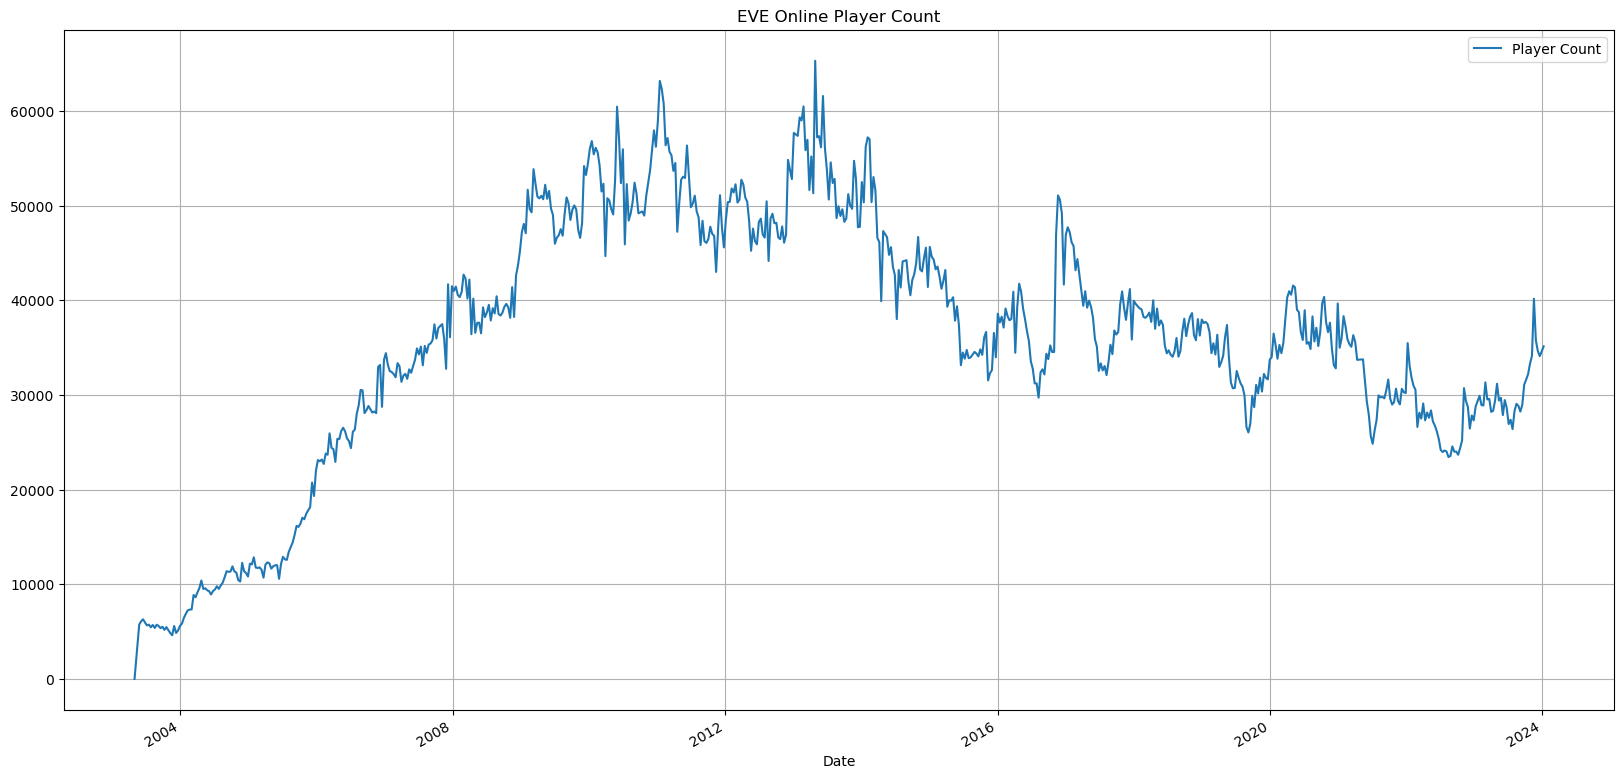

In [6]:
df.plot(x='Date', y='Player Count', figsize=(20,10), grid=True, title='EVE Online Player Count')

In [7]:
df.to_csv(r'C:\Users\raphc\OneDrive\Personal Projects\EVE Online Quant\EVE Markets\EVE Data\player_count\eve_online_data.csv', index=False)